In [11]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm
import baseline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:

problem_file = 'STAGE1_2.json'
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
'''try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'''
#solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
solution = baseline.algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)

alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Set parameter TimeLimit to value 5.8749778509140015e+01
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Academic license 2531813 - for non-commercial use only - registered to ji___@kaist.ac.kr
Optimize a model with 103 rows, 515 columns and 1248 nonzeros
Model fingerprint: 0x70ca4843
Variable types: 0 continuous, 515 integer (515 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 765156.20000
Presolve removed 89 rows and 488 columns
Presolve time: 0.00s
Presolved: 14 rows, 27 columns, 53 nonzeros
Found heuristic solution: objective 688246.90000
Variable types: 0 continuous, 27 integer (27 binary)

Root relaxation: cutoff, 0 iterations, 0.00 

{'total_cost': 344485.0,
 'avg_cost': 3444.85,
 'num_drivers': 34,
 'total_dist': 146621,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['CAR', [3, 22], [3, 22]],
  ['CAR', [19, 13], [13, 19]],
  ['BIKE', [0, 23, 5], [5, 23, 0]],
  ['CAR', [33, 6, 27], [27, 33, 6]],
  ['CAR', [8, 7, 14], [7, 14, 8]],
  ['BIKE', [25, 12, 67], [12, 67, 25]],
  ['CAR', [20, 16, 15], [15, 16, 20]],
  ['CAR', [40, 29, 17], [17, 29, 40]],
  ['CAR', [9, 10, 18], [18, 10, 9]],
  ['CAR', [21, 1, 2], [2, 21, 1]],
  ['CAR', [35, 39, 24], [24, 35, 39]],
  ['CAR', [30, 4, 26], [4, 26, 30]],
  ['BIKE', [82, 28, 99], [82, 28, 99]],
  ['CAR', [31, 11, 38], [11, 38, 31]],
  ['CAR', [47, 42, 64], [42, 47, 64]],
  ['CAR', [43, 37, 41], [37, 43, 41]],
  ['BIKE', [83, 69, 44], [44, 83, 69]],
  ['BIKE', [45, 32, 60], [32, 60, 45]],
  ['CAR', [63, 52, 49], [52, 63, 49]],
  ['CAR', [94, 50, 46], [46, 94, 50]],
  ['BIKE', [61, 95, 56], [95, 61, 56]],
  ['CAR', [58, 59, 80], [58, 59, 80]],
  ['CAR', [65, 34, 36], [34,

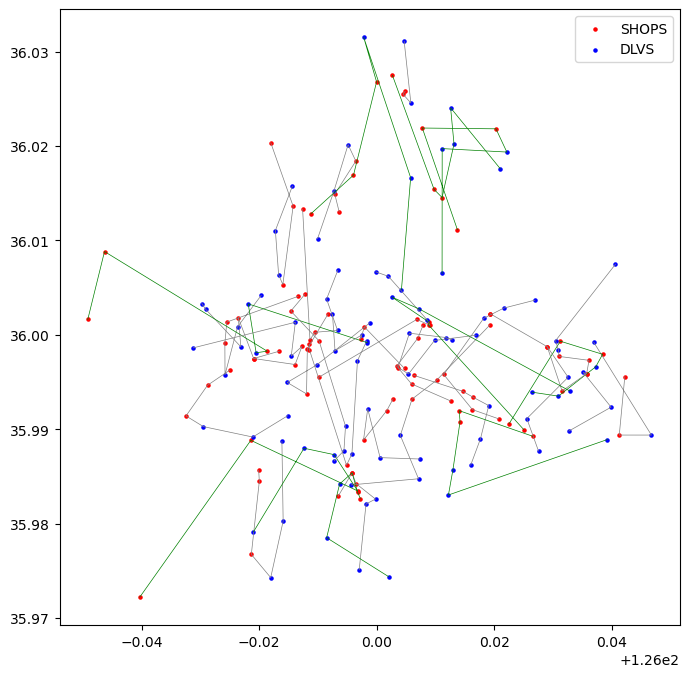

In [ ]:
draw_route_solution(ALL_ORDERS, checked_solution)

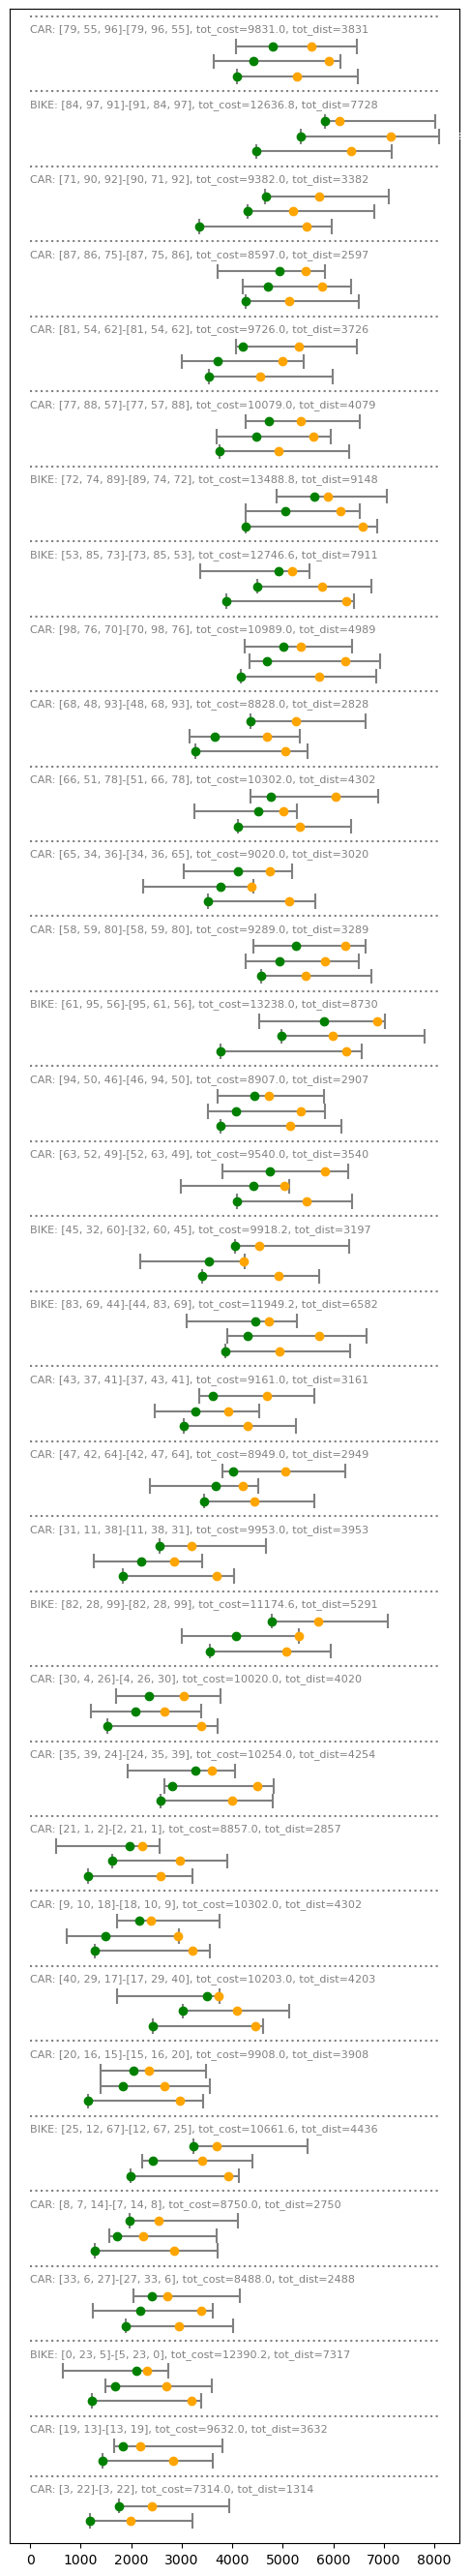

In [ ]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)